# Sistemas Nebulosos 
# Atividade prática 2 - Parte 1


Matheus Brito Faria 

Número de matricula: 2017074386



---



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = [12,7]

# Questão 3

In [2]:
def gaussmf(x, c, sigma):
    return [np.exp(-0.5*(((x_i-c)/sigma)**2)) for x_i in x]

In [3]:
x = np.arange(-100, 250, 0.1)

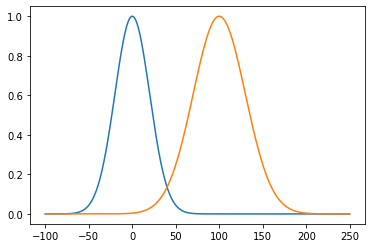

In [4]:
y1 = gaussmf(x, 0, 20)
plt.plot(x, y1)

y2 = gaussmf(x, 100, 30)
plt.plot(x, y2)

plt.show()

## Questão 4

In [5]:
def not_(y):
    return  np.array([1 - yy for yy in y])

def and_(y1, y2):
    assert len(y1) == len(y2)
    return np.array([min(y1[i], y2[i]) for i in range(len(y1))])

def or_(y1, y2):
    assert len(y1) == len(y2)
    return np.array([max(y1[i], y2[i]) for i in range(len(y1))])

def very_(y):
    return np.array([yy**2 for yy in y])


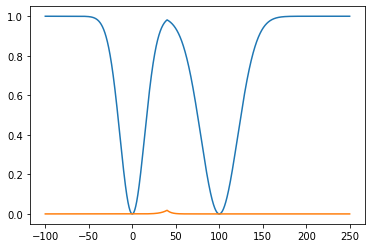

In [6]:
y1 = gaussmf(x, 0, 20)
y2 = gaussmf(x, 100, 30)

# not very young and not very old
plt.plot(x, and_(not_(very_(y1)), not_(very_(y2))))

# very young and very old
plt.plot(x, and_(very_(y1), very_(y2)))

plt.show()

# Questão 6

In [7]:
def trimf(x, a, b, c):
    assert a < b < c, "a < b < c"

    mu = list()
    for x_i in x:
        if x_i < a:
            mu.append(0)
        elif a <= x_i <= b:
            mu.append((x_i-a)/(b-a))
        elif b <= x_i <= c:
            mu.append((c-x_i)/(c-b))
        elif c < x_i:
            mu.append(0)
        else:
            raise x
    
    return mu

def trapmf(x, a, b, c, d):

    mu = list()
    for x_i in x:
        if x_i <= a:
            mu.append(0)
        elif a <= x_i <= b:
            mu.append((x_i-a)/(b-a))
        elif b < x_i < c:
            mu.append(1)
        elif c <= x_i <= d:
            mu.append((d-x_i)/(d-c))
        elif x_i > d:
            mu.append(0)
        else:
            raise x

    return mu

def act(input, A, C):
    w = max(and_(input, A))
    C = np.array(C)
    C[C > w] = w
    return C 

In [8]:
x = np.arange(2, 8, 0.01)

a1 = trapmf(x, 3, 4, 5, 6)
a2 = trapmf(x, 6, 6.5, 7, 7.5)
c1 = trimf(x, 3, 4, 5)
c2 = trimf(x, 4, 5, 6)
a_l = trimf(x, 5, 6, 7)

c1_l = act(a_l, a1, c1)
c2_l = act(a_l, a2, c2)

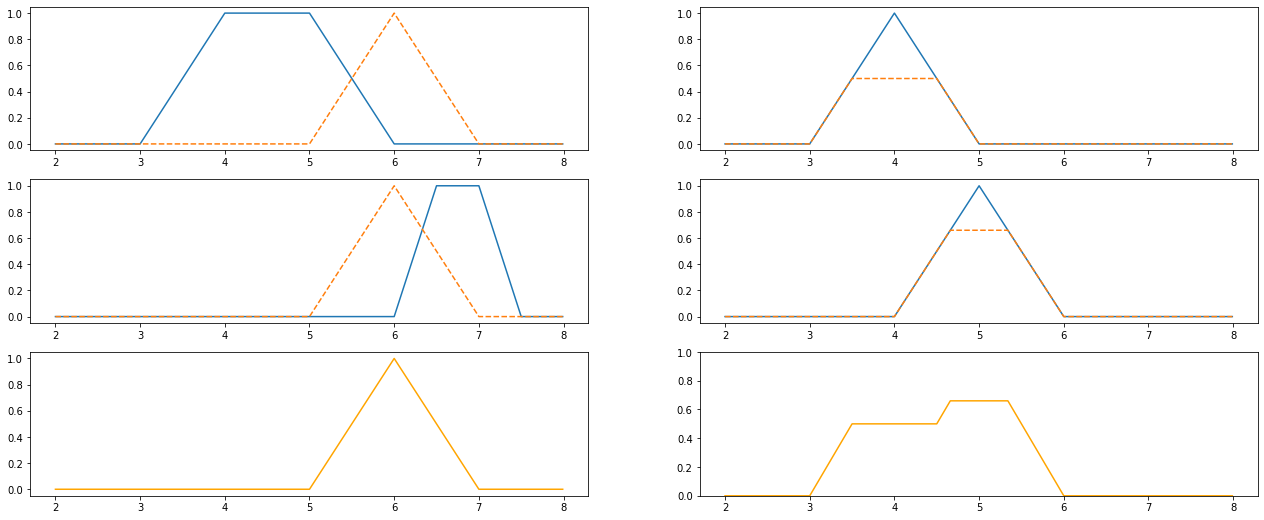

In [9]:
fig, axes = plt.subplots(3, 2, figsize=[22, 9])

axes[0, 0].plot(x, a1)
axes[0, 0].plot(x, a_l, '--')

axes[0, 1].plot(x, c1)
axes[0, 1].plot(x, c1_l, '--')

axes[1, 0].plot(x, a2)
axes[1, 0].plot(x, a_l, '--')

axes[1, 1].plot(x, c2)
axes[1, 1].plot(x, c2_l, '--')

axes[2, 0].plot(x, a_l, color='orange')

axes[2, 1].plot(x, or_(c1_l, c2_l), color='orange')
axes[2, 1].set_ylim(0, 1)

plt.show()